In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('sentiment_5_class.csv')
df.head()

# df.replace('NaN', 0)

,Phrase,Sentiment
0,injects just enough freshness into the proceed...,3
1,that,2
2,never plays as dramatic even when dramatic thi...,0
3,"None of this is very original , and it is n't ...",0
4,", Madonna gives her best performance since Abe...",3


# Data Analysis

In [3]:
#To get the No of classes used in the data set.
#0-> very sad, 1-> sad, 2->neutral, 3->happy, 4->very happy

set(df.Sentiment)

{0, 1, 2, 3, 4}

In [4]:
df.info

<bound method DataFrame.info of                                                   Phrase  Sentiment
0      injects just enough freshness into the proceed...          3
1                                                   that          2
2      never plays as dramatic even when dramatic thi...          0
3      None of this is very original , and it is n't ...          0
4      , Madonna gives her best performance since Abe...          3
...                                                  ...        ...
18384  to balance pointed , often incisive satire and...          3
18385  have to be a most hard-hearted person not to b...          4
18386                could young romantics out on a date          3
18387                                 could be this good          3
18388                                    such a dungpile          0

[18389 rows x 2 columns]>

In [5]:
df.columns

Index(['Phrase', 'Sentiment'], dtype='object')

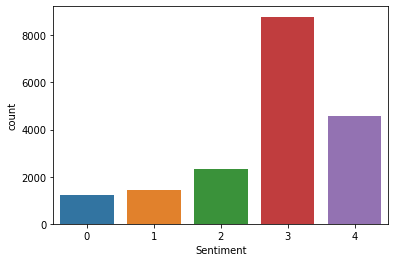

In [6]:
#Plot to show the data in each class which seems to be imbalanced data set as we have data of happy to be quite high in number than data of sad, very sad and neutral
sns.countplot(x="Sentiment", data=df)


# Split dataset to train and test set 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.Phrase.tolist()

In [9]:
y= df.Sentiment.tolist()

In [10]:
print(len(X))

18389


In [11]:
#Data split Test set 20% train set 80%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#Fetching the splited dataset i.e given train and test data 
train_set = pd.read_csv('sentiment_5_class_train.csv')
test_set = pd.read_csv('sentiment_5_class_test.csv')
X_train = train_set.Phrase.tolist()
y_train = train_set.Sentiment.tolist()

X_test = test_set.Phrase.tolist()
y_test = test_set.Sentiment.tolist()

print(len(train_set))
print(len(test_set))


14711
3678


In [12]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

['the prisoner', 'The sheer joy and pride they took in their work -- and in each other --', 'has never made a more sheerly beautiful film than this unexpectedly moving meditation on love , history , memory , resistance and artistic transcendence', 'the story has the sizzle of old news that has finally found the right vent -LRB- accurate ?', 'far superior', 'said the film was better than Saving Private Ryan .', 'by', 'performance', 'such a dungpile', 'through this film', 'delivers real bump-in - the-night chills', 'come up', 'that come full circle to end on a positive -LRB- if tragic -RRB- note', '... is a brilliantly played , deeply unsettling experience .', 'refreshingly forthright', 'be more like hell', 'an engrossing story about a horrifying historical event', 'a fantastic dual performance', 'A vivid , spicy footnote to history , and a movie that grips and holds you in rapt attention from', "there 's nothing very attractive about this movie", 'inside the wave', 'several cliched movi

In [13]:
# why Kfold validation is used

# def k_fold_cross_validation:
    

# Feature Extraction

In [14]:
#Count Feature Vectorization 

from sklearn.feature_extraction.text import CountVectorizer

def count_feature_vectorization(X_train, X_test):
    c_vectorizer = CountVectorizer()
    c_vectorizer.fit(X_train) #only use training data set to fit model
    c_vectorizer.get_feature_names() #vocab list
    print(c_vectorizer)
    
    #to vecorize the train and test data i.e encoding the phrases as per the dictionary created
    c_train_v =c_vectorizer.transform(X_train)
    c_test_v = c_vectorizer.transform(X_test)
    return c_train_v, c_test_v, c_vectorizer

In [15]:
c_train_v, c_test_v, c_vectorizer = count_feature_vectorization(X_train, X_test)
c_train_v.toarray()
c_test_v.toarray()



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
#TF IDF Feature Vectorization 

from sklearn.feature_extraction.text import TfidfVectorizer

def Tfidf_feature_vectorization(X_train, X_test):
    
    t_vectorizer = TfidfVectorizer()
    t_vectorizer.fit(X_train) #only use training data set to fit model
    t_vectorizer.get_feature_names() #vocab list
    print(t_vectorizer)
    
    #to vecorize the train and test data i.e encoding the phrases as per the dictionary created
    t_train_v =t_vectorizer.transform(X_train)
    t_test_v = t_vectorizer.transform(X_test)
    return t_train_v, t_test_v, t_vectorizer

In [17]:
t_train_v, t_test_v, t_vectorizer = Tfidf_feature_vectorization(X_train, X_test)
t_train_v.toarray()
t_test_v.toarray()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Build

In [18]:
from sklearn.svm import SVC

In [19]:
def svm_model(X_train_v, y_train):
    model = SVC(random_state = 1)
    model.fit(X_train_v, y_train)
    return model


In [20]:
model_count_vectorization = svm_model(c_train_v, y_train)  #count_vectorization

model_count_vectorization

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
model_tfidf_vectorization = svm_model(t_train_v, y_train)
model_tfidf_vectorization

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

# Model Evaluation

In [23]:
from sklearn import metrics

In [24]:
def prediction(model, feature_data):
    y_pred = model.predict(feature_data)
    return y_pred

In [25]:
y_pred_tfidf = prediction(model_tfidf_vectorization, t_test_v)

y_pred_count = prediction(model_count_vectorization, c_test_v)

In [26]:
y_pred_tfidf

array([3, 4, 3, ..., 3, 2, 4])

In [27]:
y_pred_count

array([3, 4, 3, ..., 3, 2, 4])

In [28]:
#sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn'
# Build a text report showing the main classification metrics
print(metrics.classification_report(y_test, y_pred_count))

              precision    recall  f1-score   support

           0       0.79      0.45      0.57       247
           1       0.62      0.30      0.40       291
           2       0.78      0.20      0.32       469
           3       0.60      0.91      0.73      1759
           4       0.76      0.52      0.62       912

    accuracy                           0.64      3678
   macro avg       0.71      0.48      0.53      3678
weighted avg       0.68      0.64      0.61      3678



In [29]:
print(metrics.classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.81      0.55      0.65       247
           1       0.64      0.44      0.52       291
           2       0.74      0.52      0.61       469
           3       0.68      0.89      0.77      1759
           4       0.78      0.58      0.66       912

    accuracy                           0.71      3678
   macro avg       0.73      0.60      0.64      3678
weighted avg       0.72      0.71      0.70      3678



# Model Selection

In [30]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_param = {'kernel': ('linear', 'rbf'), 'C':(1,10, 0.5)}
grid_param

{'kernel': ('linear', 'rbf'), 'C': (1, 10, 0.5)}

In [43]:
grid_param = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-2],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_param

[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001, 0.01], 'C': [1, 10, 100, 1000]},
 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [32]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score, average='micro')

In [33]:
#using count vectorised train data
clf_count = GridSearchCV(SVC(), grid_param,scoring=scorer)
clf_count.fit(c_train_v, y_train)
print(clf_count)
print(clf_count.best_score_, clf_count.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 10), 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)
0.6987284810677747 {'C': 10, 'kernel': 'rbf'}


In [42]:
#using tfidf vectorised train data
scorer = make_scorer(f1_score, average='micro')
clf_tfidf = GridSearchCV(SVC(), grid_param,scoring=scorer)
clf_tfidf.fit(t_train_v, y_train)
print(clf_tfidf)
print(clf_tfidf.best_score_, clf_tfidf.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)
0.6837058195910378 {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [44]:
#using tfidf vectorised train data
scorer = make_scorer(f1_score, average='micro')
clf_tfidf = GridSearchCV(SVC(), grid_param,scoring=scorer)
clf_tfidf.fit(t_train_v, y_train)
print(clf_tfidf)
print(clf_tfidf.best_score_, clf_tfidf.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 0.01], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=micro), verbose=0)
0.6851333505653415 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


# Final Model

In [45]:
#Going to train with best hyper parameter
model = SVC(random_state=1, kernel="rbf", C=100.0, gamma=0.01)
model.fit(t_train_v, y_train)
y_pred = model.predict(t_test_v)
print(metrics.classification_report(y_test, y_pred))
#FInal result obtained

              precision    recall  f1-score   support

           0       0.73      0.66      0.70       247
           1       0.60      0.53      0.56       291
           2       0.68      0.58      0.63       469
           3       0.72      0.84      0.78      1759
           4       0.72      0.61      0.66       912

    accuracy                           0.71      3678
   macro avg       0.69      0.64      0.66      3678
weighted avg       0.71      0.71      0.71      3678

